In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
input_data = pd.read_csv('healthcare_dataset.csv')
input_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


Taking "Test Results" column as target varibale with 3 channels Inconclusive, Abnormal, normal

Data insights

In [3]:
input_data.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [4]:
input_data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
input_data.shape

(10000, 15)

In [7]:
input_data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [8]:
input_data['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

In [9]:
shape = input_data.shape
a = []
for i in input_data.columns:
    if(input_data[i].dtypes =='object'):
        a.append(i)
print('number of categorical variable',len(a))
for j in a:
    print('categorical variables: ',j)
    print('number of categories in',j,':',input_data[j].nunique())
    print('% of categories in',j,':',(input_data[j].value_counts()/shape[0])*100)
    print('==============================')

number of categorical variable 12
categorical variables:  Name
number of categories in Name : 9378
% of categories in Name : Michael Johnson        0.07
James Johnson          0.06
Michael Miller         0.04
Michelle Williams      0.04
Scott Smith            0.04
                       ... 
Sharon Rose            0.01
Stephanie Knox         0.01
Anthony Jones          0.01
Melissa Perkins DVM    0.01
Eric King              0.01
Name: Name, Length: 9378, dtype: float64
categorical variables:  Gender
number of categories in Gender : 2
% of categories in Gender : Female    50.75
Male      49.25
Name: Gender, dtype: float64
categorical variables:  Blood Type
number of categories in Blood Type : 8
% of categories in Blood Type : AB-    12.75
AB+    12.58
B-     12.52
O+     12.48
O-     12.44
B+     12.44
A+     12.41
A-     12.38
Name: Blood Type, dtype: float64
categorical variables:  Medical Condition
number of categories in Medical Condition : 6
% of categories in Medical Condition : A

<Axes: xlabel='Test Results', ylabel='count'>

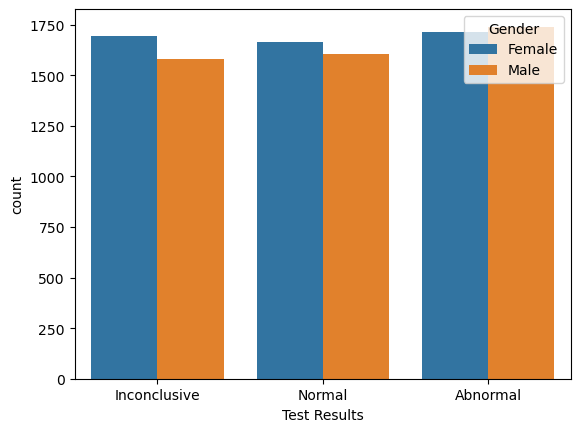

In [10]:
sns.countplot(x = input_data['Test Results'], hue = input_data['Gender'])

<Axes: xlabel='Test Results', ylabel='count'>

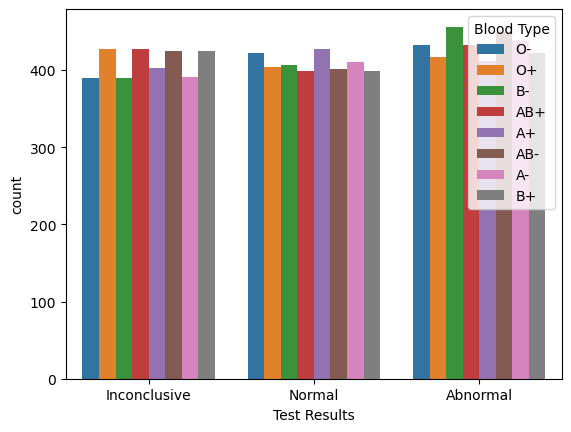

In [11]:
sns.countplot(x = input_data['Test Results'], hue = input_data['Blood Type'])

Changing the age into age group

In [12]:
input_data = input_data.assign(Age_group=pd.cut(input_data['Age'], bins=[16, 30, 45, 90], right=False, labels=["young", "middle", "old"]))

In [13]:
input_data[["Age","Age_group"]].head(10) 

,Age,Age_group
0,81,old
1,35,middle
2,61,old
3,49,old
4,51,old
5,41,middle
6,82,old
7,55,old
8,33,middle
9,39,middle


In [14]:
input_data.drop(columns="Age",inplace=True)

<Axes: xlabel='Test Results', ylabel='count'>

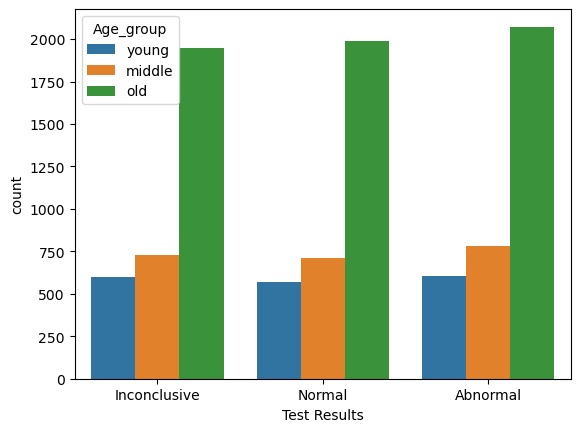

In [15]:
sns.countplot(x = input_data['Test Results'], hue = input_data['Age_group'])

Dropping name, Room Number since it wont affect the prediction

In [16]:
input_data.drop(columns=["Name","Room Number"],inplace=True)

In [17]:
input_data["Hospital"].value_counts()

Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: Hospital, Length: 8639, dtype: int64

In [18]:
input_data["Hospital"].nunique()

8639

In [19]:
input_data["Doctor"].value_counts()

Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
                    ..
Sandra Howard        1
Steven Fuller        1
Benjamin Lawson      1
Allison Woods        1
Tasha Avila          1
Name: Doctor, Length: 9416, dtype: int64

In [20]:
input_data["Doctor"].nunique()

9416

In [21]:
#we can convert the dates into number of days in hospital
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              10000 non-null  object  
 1   Blood Type          10000 non-null  object  
 2   Medical Condition   10000 non-null  object  
 3   Date of Admission   10000 non-null  object  
 4   Doctor              10000 non-null  object  
 5   Hospital            10000 non-null  object  
 6   Insurance Provider  10000 non-null  object  
 7   Billing Amount      10000 non-null  float64 
 8   Admission Type      10000 non-null  object  
 9   Discharge Date      10000 non-null  object  
 10  Medication          10000 non-null  object  
 11  Test Results        10000 non-null  object  
 12  Age_group           10000 non-null  category
dtypes: category(1), float64(1), object(11)
memory usage: 947.5+ KB


In [22]:
input_data["Date of Admission"] = pd.to_datetime(input_data["Date of Admission"])
input_data["Discharge Date"] = pd.to_datetime(input_data["Discharge Date"])

In [23]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gender              10000 non-null  object        
 1   Blood Type          10000 non-null  object        
 2   Medical Condition   10000 non-null  object        
 3   Date of Admission   10000 non-null  datetime64[ns]
 4   Doctor              10000 non-null  object        
 5   Hospital            10000 non-null  object        
 6   Insurance Provider  10000 non-null  object        
 7   Billing Amount      10000 non-null  float64       
 8   Admission Type      10000 non-null  object        
 9   Discharge Date      10000 non-null  datetime64[ns]
 10  Medication          10000 non-null  object        
 11  Test Results        10000 non-null  object        
 12  Age_group           10000 non-null  category      
dtypes: category(1), datetime64[ns](2), float64(1), 

In [24]:
input_data["days in Hospital"] = (input_data["Discharge Date"]-input_data["Date of Admission"]).dt.days
 

In [25]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gender              10000 non-null  object        
 1   Blood Type          10000 non-null  object        
 2   Medical Condition   10000 non-null  object        
 3   Date of Admission   10000 non-null  datetime64[ns]
 4   Doctor              10000 non-null  object        
 5   Hospital            10000 non-null  object        
 6   Insurance Provider  10000 non-null  object        
 7   Billing Amount      10000 non-null  float64       
 8   Admission Type      10000 non-null  object        
 9   Discharge Date      10000 non-null  datetime64[ns]
 10  Medication          10000 non-null  object        
 11  Test Results        10000 non-null  object        
 12  Age_group           10000 non-null  category      
 13  days in Hospital    10000 non-null  int64      

In [26]:
input_data.drop(columns=["Date of Admission","Discharge Date"], inplace=True)

In [27]:
input_data["days in Hospital"].describe()

count    10000.000000
mean        15.561800
std          8.612038
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: days in Hospital, dtype: float64

In [28]:
input_data["Billing Amount"].describe()

count    10000.000000
mean     25516.806778
std      14067.292709
min       1000.180837
25%      13506.523967
50%      25258.112566
75%      37733.913727
max      49995.902283
Name: Billing Amount, dtype: float64

<Axes: >

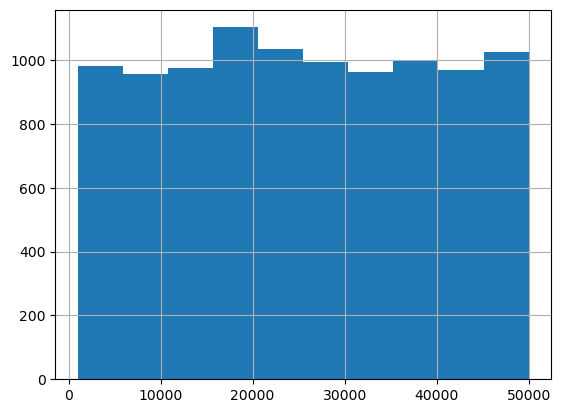

In [29]:
input_data["Billing Amount"].hist()

(array([ 981.,  958.,  976., 1103., 1034.,  995.,  962.,  996.,  968.,
        1027.]),
 array([ 1000.18083702,  5899.75298164, 10799.32512626, 15698.89727088,
        20598.4694155 , 25498.04156012, 30397.61370474, 35297.18584936,
        40196.75799398, 45096.3301386 , 49995.90228322]),
 <BarContainer object of 10 artists>)

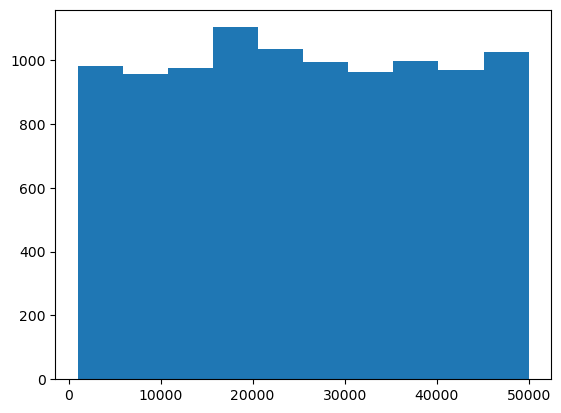

In [30]:
plt.hist(input_data["Billing Amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1873c522c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1873c5231c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1873c5229b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1873c523700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1873c5239a0>],
 'means': []}

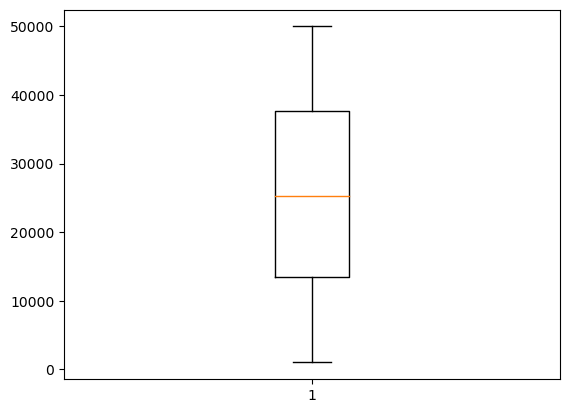

In [31]:
plt.boxplot(input_data["Billing Amount"])

In [32]:
input_data = input_data.assign(bill_group=pd.cut(input_data['Billing Amount'], bins=[0, 16666.666666666666666666666666667, 33333.333333333333333333333333334, 50000], right=False, labels=["less", "medium", "high"]))

<Axes: xlabel='Test Results', ylabel='count'>

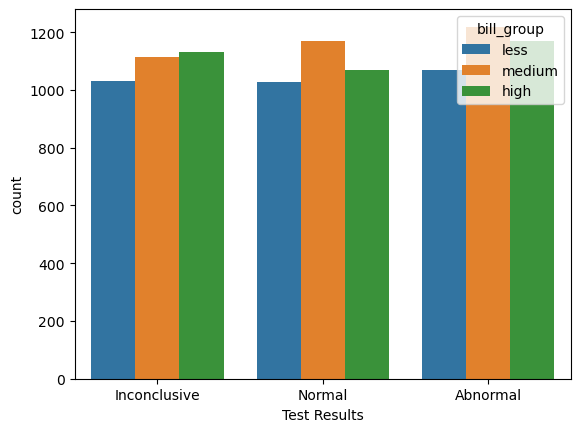

In [33]:
sns.countplot(x = input_data['Test Results'], hue = input_data['bill_group'])

In [34]:
input_data.drop(columns="Billing Amount",inplace=True)

In [35]:
input_data.to_csv('meta_data(data_cleaned).csv')

In [36]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              10000 non-null  object  
 1   Blood Type          10000 non-null  object  
 2   Medical Condition   10000 non-null  object  
 3   Doctor              10000 non-null  object  
 4   Hospital            10000 non-null  object  
 5   Insurance Provider  10000 non-null  object  
 6   Admission Type      10000 non-null  object  
 7   Medication          10000 non-null  object  
 8   Test Results        10000 non-null  object  
 9   Age_group           10000 non-null  category
 10  days in Hospital    10000 non-null  int64   
 11  bill_group          10000 non-null  category
dtypes: category(2), int64(1), object(9)
memory usage: 801.2+ KB


In [37]:
input_data

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,Elective,Aspirin,Inconclusive,old,14,high
1,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,Emergency,Lipitor,Normal,middle,14,high
2,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,Emergency,Lipitor,Normal,old,30,high
3,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,Urgent,Penicillin,Abnormal,old,1,medium
4,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,Urgent,Paracetamol,Normal,old,24,medium
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Male,A+,Obesity,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,Elective,Ibuprofen,Abnormal,old,4,high
9996,Female,AB+,Arthritis,Christopher Yates,Nash-Krueger,Blue Cross,Emergency,Ibuprofen,Normal,old,23,less
9997,Male,B-,Arthritis,Robert Nicholson,Larson and Sons,Blue Cross,Elective,Ibuprofen,Normal,old,14,high
9998,Male,A+,Arthritis,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,Urgent,Penicillin,Normal,old,20,medium


In [38]:
#encoding input
def encoding(categorical,df):
    num_categorical = len(categorical)
    cat_dict = {}
    for i in categorical:
        lst = df[i].unique()
        list_length = len(lst)
        num = 0
        cat_val_inside = {}
        for j in lst:
            cat_val_inside[j]=num
            num+=1
        cat_dict[i]=cat_val_inside
    return cat_dict

In [39]:
categorical_cols = input_data.select_dtypes(include=['object','category']).columns
numberical_cols = input_data.select_dtypes(exclude='object').columns
categorical=[]
for cat in categorical_cols:
    categorical.append(cat)
numerical=[]
for num in numberical_cols:
    numerical.append(num)
encoded_data = input_data.replace(encoding(categorical,input_data))

In [40]:
encoded_data

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,0,0,0,14,0
1,1,1,1,1,1,1,1,1,1,1,14,0
2,1,2,2,2,2,0,1,1,1,0,30,0
3,1,2,1,3,3,0,2,2,2,0,1,1
4,1,0,3,4,4,1,2,3,1,0,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2,9411,8635,1,0,4,2,0,4,0
9996,0,3,3,9412,8636,4,1,4,1,0,23,2
9997,1,2,3,9413,2529,4,0,4,1,0,14,0
9998,1,4,3,9414,8637,1,2,2,1,0,20,1


In [41]:
encoded_data.drop(columns=["Doctor","Hospital"],inplace=True)

In [42]:
ss = StandardScaler()

In [43]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              10000 non-null  int64   
 1   Blood Type          10000 non-null  int64   
 2   Medical Condition   10000 non-null  int64   
 3   Insurance Provider  10000 non-null  int64   
 4   Admission Type      10000 non-null  int64   
 5   Medication          10000 non-null  int64   
 6   Test Results        10000 non-null  int64   
 7   Age_group           10000 non-null  category
 8   days in Hospital    10000 non-null  int64   
 9   bill_group          10000 non-null  category
dtypes: category(2), int64(8)
memory usage: 644.9 KB


In [44]:
encoded_data

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,0,14,0
1,1,1,1,1,1,1,1,1,14,0
2,1,2,2,0,1,1,1,0,30,0
3,1,2,1,0,2,2,2,0,1,1
4,1,0,3,1,2,3,1,0,24,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,4,2,1,0,4,2,0,4,0
9996,0,3,3,4,1,4,1,0,23,2
9997,1,2,3,4,0,4,1,0,14,0
9998,1,4,3,1,2,2,1,0,20,1


In [45]:
x = encoded_data.drop('Test Results',1)
y = encoded_data['Test Results']

In [46]:
num = ['days in Hospital']

In [47]:
x[num] = ss.fit_transform(x[num])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [49]:
x

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Age_group,days in Hospital,bill_group
0,0,0,0,0,0,0,0,-0.181360,0
1,1,1,1,1,1,1,1,-0.181360,0
2,1,2,2,0,1,1,0,1.676598,0
3,1,2,1,0,2,2,0,-1.690950,1
4,1,0,3,1,2,3,0,0.979864,1
...,...,...,...,...,...,...,...,...,...
9995,1,4,2,1,0,4,0,-1.342583,0
9996,0,3,3,4,1,4,0,0.863741,2
9997,1,2,3,4,0,4,0,-0.181360,0
9998,1,4,3,1,2,2,0,0.515374,1


In [50]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [51]:
lr_model = lr.fit(x_train,y_train)

In [52]:
y_test_pred = lr_model.predict(x_test)
y_train_pred = lr_model.predict(x_train)
y_test_prob_1 = lr_model.predict_proba(x_test)[:,1]

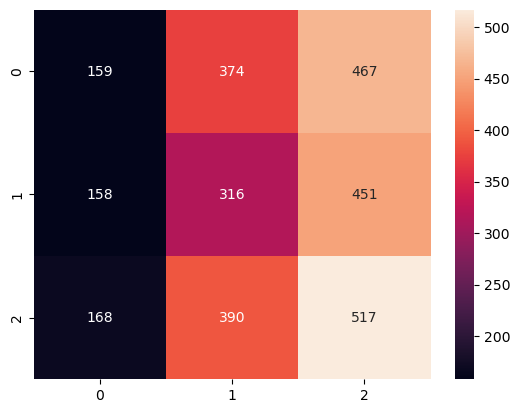

In [53]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [54]:
lr_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",lr_accuracy_score)

Train accuracy =  0.3462857142857143


In [55]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(lr,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.29695006 0.31917941 0.27228086 0.26420505 0.26618229]
Bias error: 0.7162404658499026
Variance error: 0.07478516201206653


In [76]:
params = {'penalty':['l1', 'l2', 'elasticnet'], 'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'n_jobs': np.arange(2,15), 'max_iter': np.arange(2,15), 'random_state': np.arange(2,15)}
cv = KFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
lr = GridSearchCV(lr,param_grid=params,cv=5,scoring='recall')
lr.fit(x_train,y_train)

TypeError: KFold.__init__() got an unexpected keyword argument 'n_repeats'

In [ ]:
best = lr.best_params_
best

In [56]:
dt = DecisionTreeClassifier(random_state=20)

In [57]:
dt_model = dt.fit(x_train,y_train)

In [58]:
y_test_pred = dt_model.predict(x_test)
y_train_pred = dt_model.predict(x_train)
y_test_prob_1 = dt_model.predict_proba(x_test)[:,1]

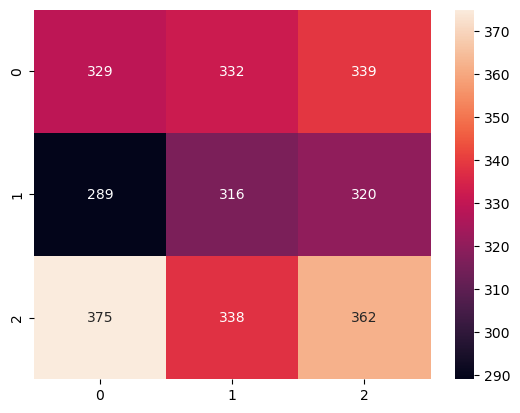

In [59]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [60]:
print(classification_report(y_test.astype(float),y_test_pred))

              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33      1000
         1.0       0.32      0.34      0.33       925
         2.0       0.35      0.34      0.35      1075

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [61]:
print(classification_report(y_train.astype(float),y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2277
         1.0       1.00      1.00      1.00      2342
         2.0       1.00      1.00      1.00      2381

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [62]:
dt_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",dt_accuracy_score)

Train accuracy =  0.9985714285714286


In [63]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(dt,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32250567 0.33485494 0.33836907 0.3315936  0.32092826]
Bias error: 0.6703496904137054
Variance error: 0.020752520892914832


In [64]:
params = {'criterion':['entropy', 'gini'],'max_depth':np.arange(2,15),
          'min_samples_split':np.arange(2,10)}
dt = GridSearchCV(dt,param_grid=params,cv=5,scoring='recall')
dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='recall')

In [65]:
best = dt.best_params_
best

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [66]:
best = {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 6}

In [67]:
dt = DecisionTreeClassifier(**best)

In [68]:
dt_model = dt.fit(x_train,y_train)
y_test_pred = dt_model.predict(x_test)
y_train_pred = dt_model.predict(x_train)

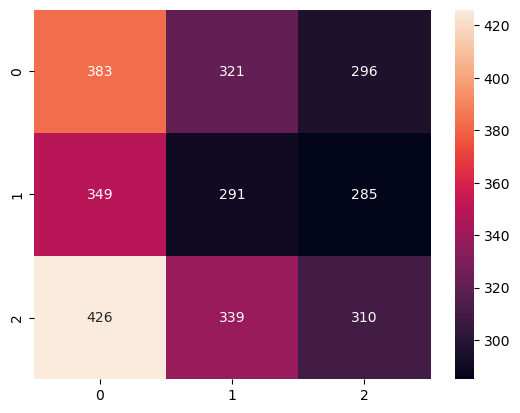

In [69]:
cm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt='.0f');

In [70]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.33      0.38      0.35      1000
           1       0.31      0.31      0.31       925
           2       0.35      0.29      0.32      1075

    accuracy                           0.33      3000
   macro avg       0.33      0.33      0.33      3000
weighted avg       0.33      0.33      0.33      3000



In [71]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.80      2277
           1       0.81      0.80      0.81      2342
           2       0.85      0.76      0.80      2381

    accuracy                           0.80      7000
   macro avg       0.81      0.80      0.80      7000
weighted avg       0.81      0.80      0.80      7000



In [72]:
dt_accuracy_score = accuracy_score(y_train,y_train_pred)
print("Train accuracy = ",dt_accuracy_score)

Train accuracy =  0.804


In [73]:
k = KFold(n_splits = 5, shuffle = True, random_state = 48)
scores = cross_val_score(dt,x,y,cv=k,scoring = 'f1_weighted')
dt_bias = 1-np.mean(scores)
dt_var = np.std(scores)/np.mean(scores)
print('Scores:',scores)
print('Bias error:',1-np.mean(scores))
print('Variance error:', np.std(scores)/np.mean(scores))

Scores: [0.32935305 0.33724062 0.3416919  0.31692941 0.32760292]
Bias error: 0.6694364183973575
Variance error: 0.02583062567110303
